In [12]:
from fastai import *
from fastai.vision import *

%matplotlib inline

In [1]:
# ...got a bunch of images of Anthony Hopkins, Ian McKellan, Derek Jacobi
# using Google Images and instructions from fastai deep learning course 1, lesson 2...
# For me, the commands to paste into developer console worked on firefox but not chrome...

In [51]:
# create databunch
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [52]:
# verify classes
data.classes

['hopkins', 'jacobi', 'mckellan']

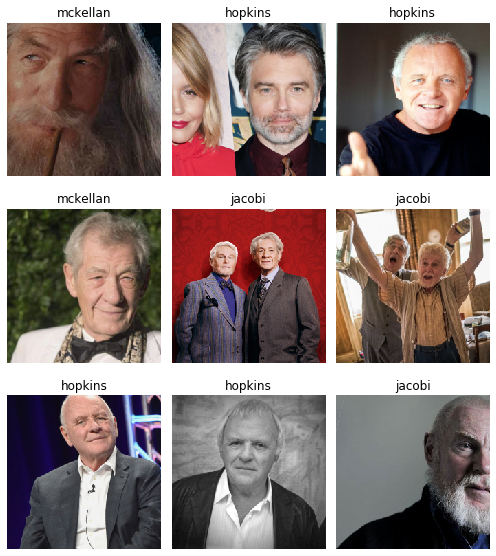

In [53]:
# take a peek
data.show_batch(rows=3, figsize=(7,8))

In [54]:
# check train / valid split
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['hopkins', 'jacobi', 'mckellan'], 3, 428, 107)

In [55]:
# note use 'cnn_learner' instead of 'create_cnn'
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [24]:
# first version
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.640503,2.249442,0.691589,00:46
1,1.440883,1.204343,0.355140,00:43
2,1.265925,0.909901,0.280374,00:43
3,1.127167,0.821259,0.280374,00:44


In [25]:
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


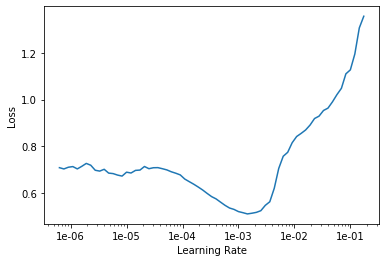

In [26]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(2, max_lr=slice(7e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.859275,0.561188,0.214953,00:42
1,0.669868,0.542098,0.233645,00:42


In [28]:
learn.save('stage-2')

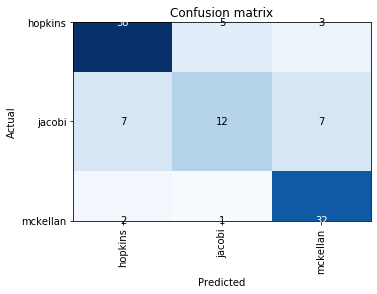

In [29]:
learn.load('stage-2')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

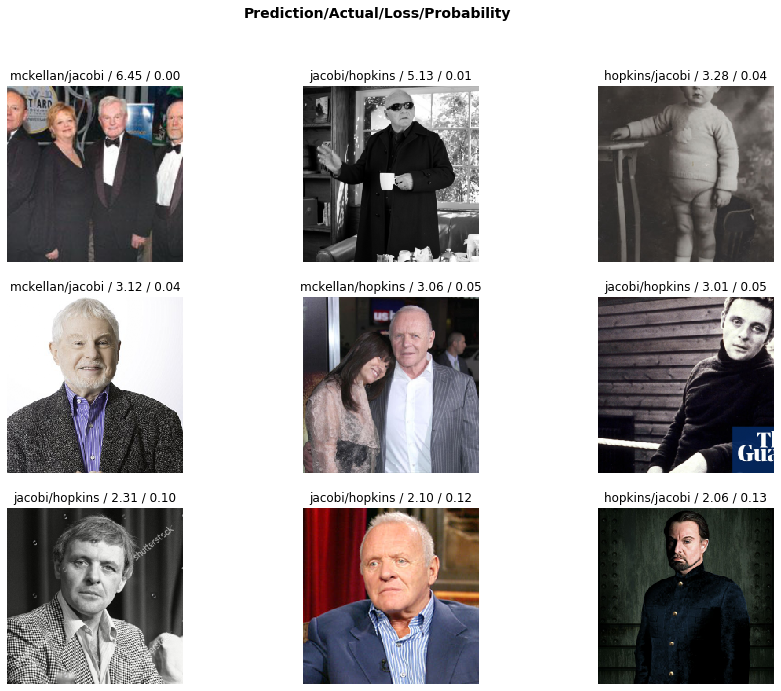

In [31]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
# also tried to clean up images, did not make much difference on error rate